In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, KFold, GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [139]:
df = pd.read_excel("Train.xlsx")
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on Sun, 10 Feb",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [141]:
df.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


In [142]:
df.isnull().sum()

,0
Qualification,0
Experience,0
Rating,3302
Place,25
Profile,0
Miscellaneous_Info,2620
Fees,0


In [143]:
df.nunique()

,0
Qualification,1420
Experience,64
Rating,51
Place,877
Profile,6
Miscellaneous_Info,2998
Fees,40


#PREPROCESSING 1

In [144]:
df['Qualification'].head()

,Qualification
0,"BHMS, MD - Homeopathy"
1,"BAMS, MD - Ayurveda Medicine"
2,"MBBS, MS - Otorhinolaryngology"
3,"BSc - Zoology, BAMS"
4,BAMS


In [145]:
df['Num_of_Qualifications']=df['Qualification'].apply(lambda x: int(len(x.split(','))))
df.drop('Qualification',axis=1,inplace=True)
df['Num_of_Qualifications'].head()

,Num_of_Qualifications
0,2
1,2
2,2
3,2
4,1


In [146]:
df['Experience'].head()

,Experience
0,24 years experience
1,12 years experience
2,9 years experience
3,12 years experience
4,20 years experience


In [147]:
df['Experience'] = df['Experience'].str.extract('(\d+)').astype(int)
df['Experience'].head()

,Experience
0,24
1,12
2,9
3,12
4,20


In [148]:
df['Rating'].head()

,Rating
0,100%
1,98%
2,NaN
3,NaN
4,100%


In [149]:
df['Rating'] = df['Rating'].apply(lambda x: int(x.rstrip('%')) if isinstance(x, str) else x)
df['Rating'].head()

,Rating
0,100.0
1,98.0
2,NaN
3,NaN
4,100.0


In [150]:
df['Rating'].isnull().sum()

3302

In [151]:
df['Rating'].fillna(df['Rating'].mean(), inplace=True)

In [152]:
df['Rating'].head()

,Rating
0,100.000000
1,98.000000
2,94.643475
3,94.643475
4,100.000000


In [153]:
df['Place'].head()

,Place
0,"Kakkanad, Ernakulam"
1,"Whitefield, Bangalore"
2,"Mathikere - BEL, Bangalore"
3,"Bannerghatta Road, Bangalore"
4,"Keelkattalai, Chennai"


In [154]:
df['Place'].isnull().sum()

25

In [155]:
df = df.dropna(subset=['Place'])
df['Place'].head()

,Place
0,"Kakkanad, Ernakulam"
1,"Whitefield, Bangalore"
2,"Mathikere - BEL, Bangalore"
3,"Bannerghatta Road, Bangalore"
4,"Keelkattalai, Chennai"


In [156]:
df['Place'] = df['Place'].apply(lambda x: x.split(',')[-1].strip())
df['Place'].head()

<ipython-input-156-4f6846b0e86c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Place'] = df['Place'].apply(lambda x: x.split(',')[-1].strip())


,Place
0,Ernakulam
1,Bangalore
2,Bangalore
3,Bangalore
4,Chennai


In [157]:
unique_Place = df['Place'].value_counts()
print(unique_Place)

Place
Bangalore             1258
Mumbai                1219
Delhi                 1185
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
e                        1
Name: count, dtype: int64


In [158]:
df = df[df['Place'] != 'e']

In [159]:
pd.set_option('display.max_colwidth', None)
df['Miscellaneous_Info'].head()

,Miscellaneous_Info
0,"100% 16 Feedback Kakkanad, Ernakulam"
1,"98% 76 Feedback Whitefield, Bangalore"
2,NaN
3,"Bannerghatta Road, Bangalore ₹250 Available on Sun, 10 Feb"
4,"100% 4 Feedback Keelkattalai, Chennai"


* with miscellaneous info = 1
* with no miscellaneous info = 0

In [160]:
df['Miscellaneous_Info'] = df['Miscellaneous_Info'].apply(lambda x: 1 if pd.notnull(x) else 0)
df['Miscellaneous_Info'].head()

,Miscellaneous_Info
0,1
1,1
2,0
3,1
4,1


# EDA

In [161]:
df.head()

,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Num_of_Qualifications
0,24,100.000000,Ernakulam,Homeopath,1,100,2
1,12,98.000000,Bangalore,Ayurveda,1,350,2
2,9,94.643475,Bangalore,ENT Specialist,0,300,2
3,12,94.643475,Bangalore,Ayurveda,1,250,2
4,20,100.000000,Chennai,Ayurveda,1,250,1


## Experience

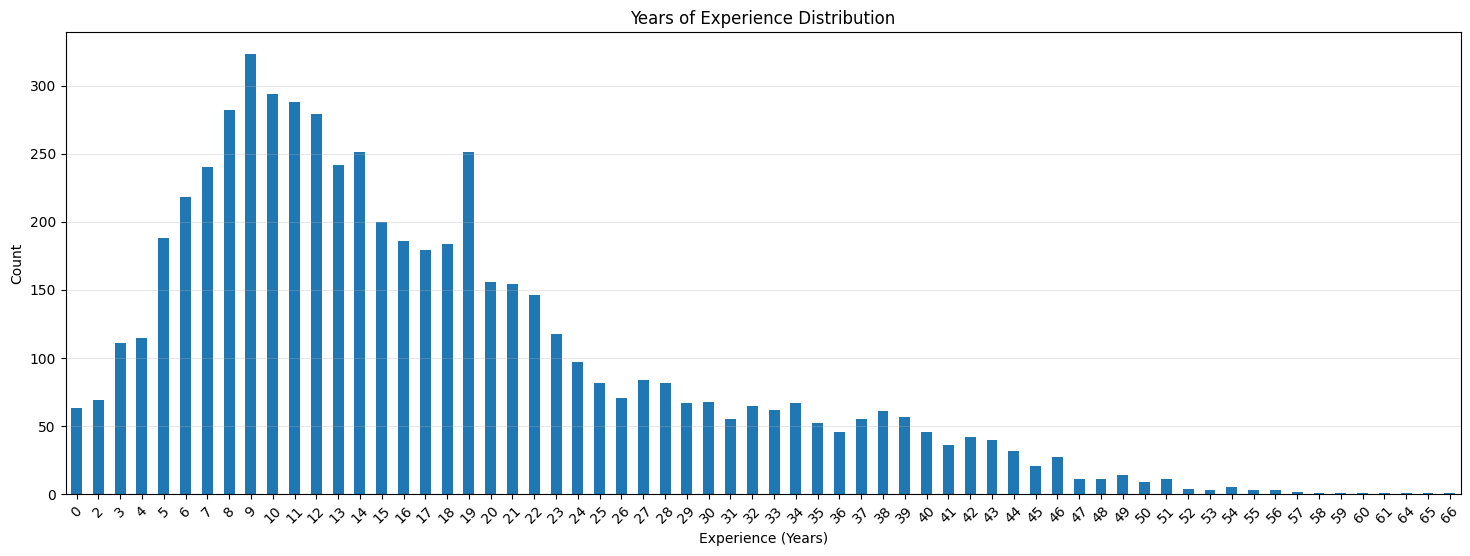

In [162]:
experience_counts = df['Experience'].value_counts().sort_index()

plt.figure(figsize=(18, 6))
experience_counts.plot(kind='bar')
plt.xlabel('Experience (Years)')
plt.ylabel('Count')
plt.title('Years of Experience Distribution')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()

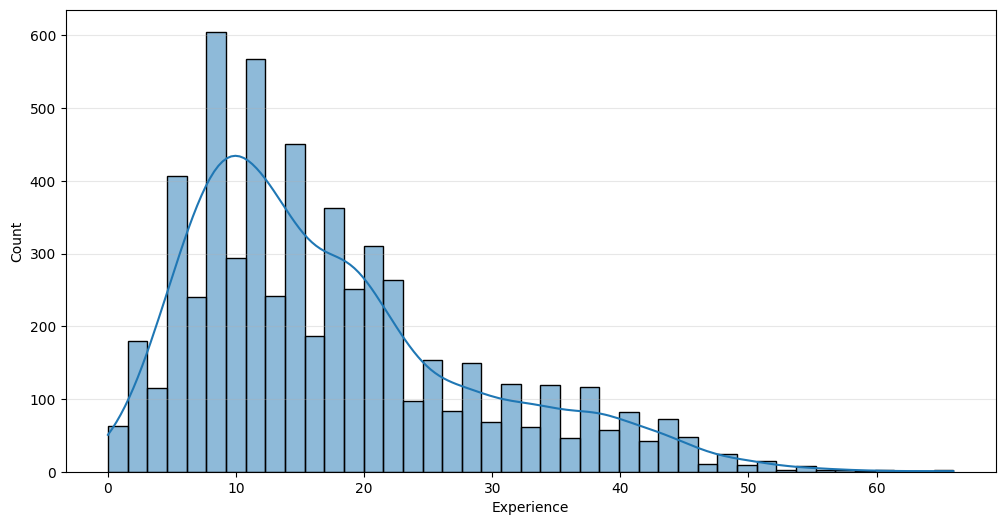

In [163]:
plt.figure(figsize=(12,6))
sns.histplot(df['Experience'],kde=True)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

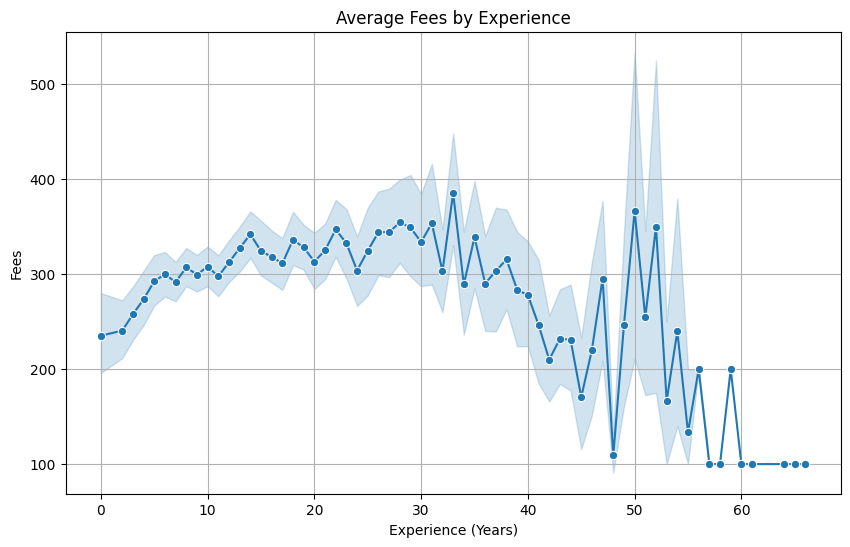

In [164]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Experience', y='Fees', data=df, marker='o')
plt.title('Average Fees by Experience')
plt.xlabel('Experience (Years)')
plt.ylabel('Fees')
plt.grid(True)
plt.show()

## Rating

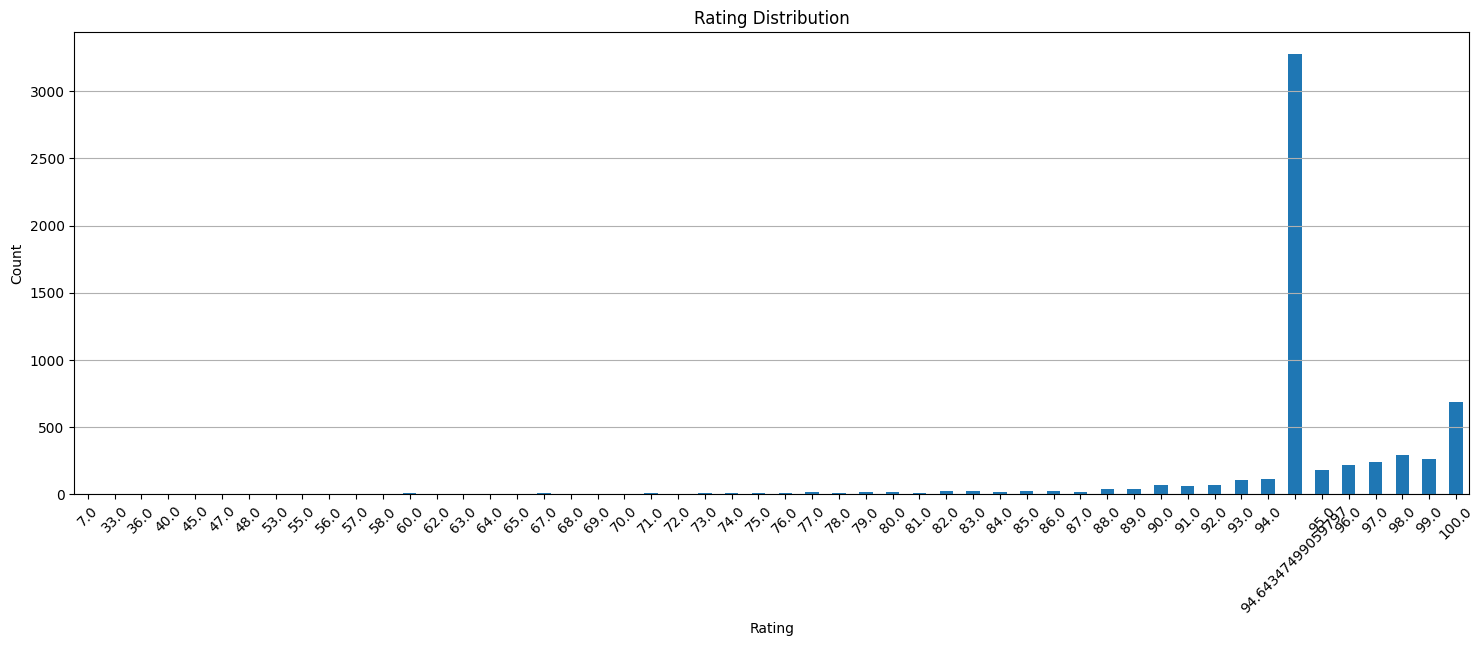

In [165]:
rating_counts = df['Rating'].value_counts().sort_index()

plt.figure(figsize=(18, 6))
rating_counts.plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

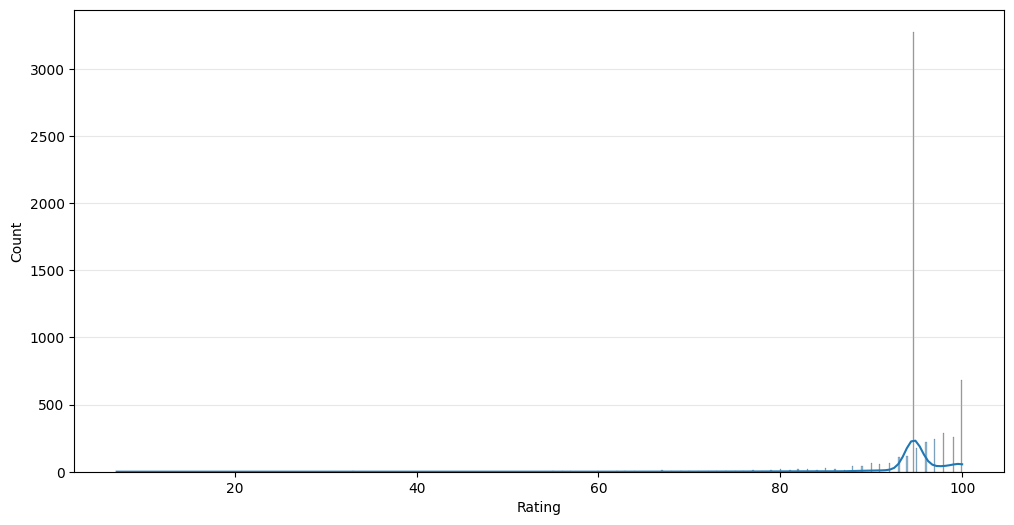

In [166]:
plt.figure(figsize=(12,6))
sns.histplot(df['Rating'],kde=True)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

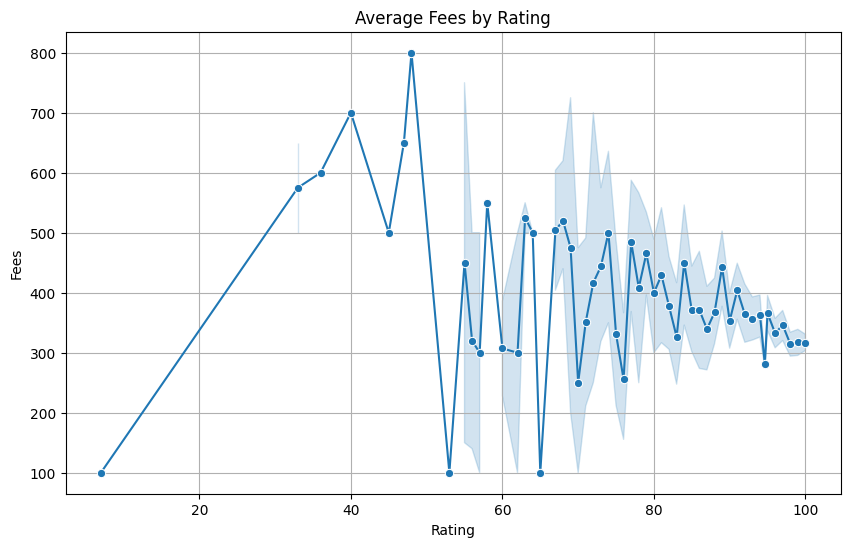

In [167]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Rating', y='Fees', data=df, marker='o')
plt.title('Average Fees by Rating')
plt.xlabel('Rating')
plt.ylabel('Fees')
plt.grid(True)
plt.show()

## Profile

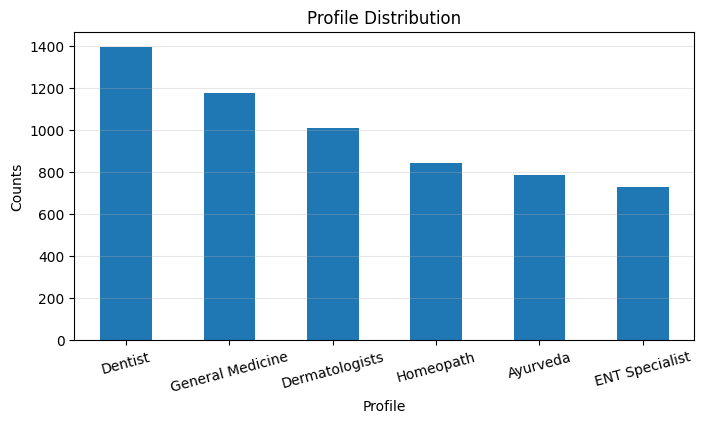

In [168]:
profile_counts = df['Profile'].value_counts()
plt.figure(figsize=(8, 4))
profile_counts.plot(kind='bar')
plt.title('Profile Distribution')
plt.xlabel('Profile')
plt.ylabel('Counts')
plt.xticks(rotation=15)
plt.grid(axis='y', alpha=0.3)
plt.show()

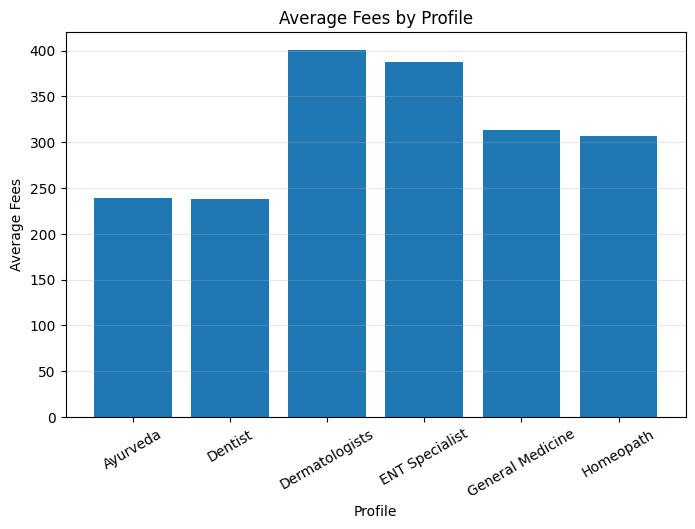

In [169]:
average_fees = df.groupby('Profile')['Fees'].mean().reset_index()

plt.figure(figsize=(8, 5))
plt.bar(average_fees['Profile'], average_fees['Fees'])
plt.xlabel('Profile')
plt.ylabel('Average Fees')
plt.title('Average Fees by Profile')
plt.xticks(rotation=30)
plt.grid(axis='y', alpha=0.3)
plt.show()

## Miscellaneous Info

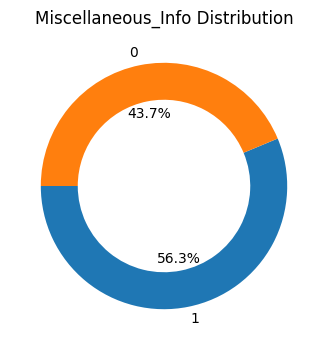

In [170]:
info_counts = df['Miscellaneous_Info'].value_counts()

plt.figure(figsize=(5, 4))
plt.pie(info_counts, labels=info_counts.index, autopct='%1.1f%%', startangle=180, wedgeprops=dict(width=0.3))
plt.title('Miscellaneous_Info Distribution')
plt.show()

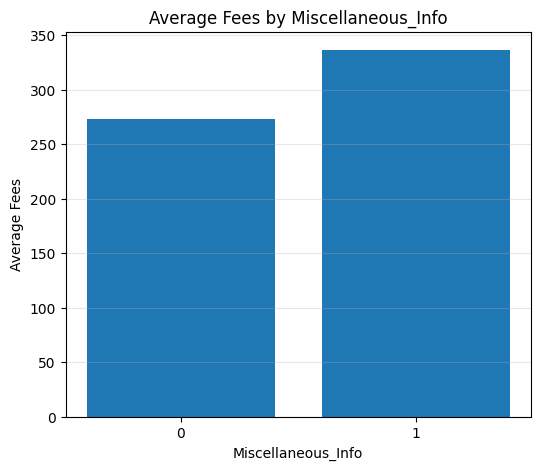

In [171]:
average_fees = df.groupby('Miscellaneous_Info')['Fees'].mean().reset_index()

plt.figure(figsize=(6, 5))
plt.bar(average_fees['Miscellaneous_Info'], average_fees['Fees'])
plt.xlabel('Miscellaneous_Info')
plt.ylabel('Average Fees')
plt.title('Average Fees by Miscellaneous_Info')
plt.xticks(average_fees['Miscellaneous_Info'])
plt.grid(axis='y', alpha=0.3)
plt.show()

## Num of Qualification

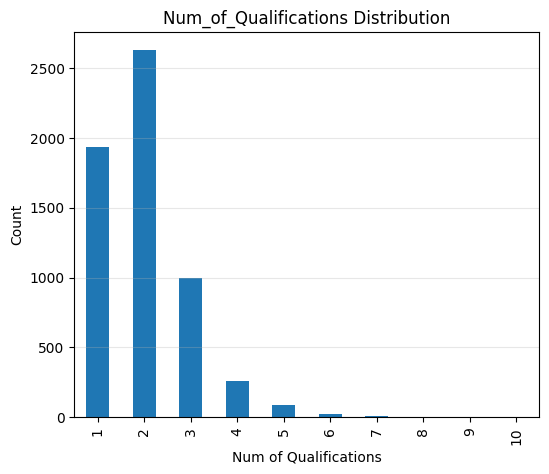

In [172]:
experience_counts = df['Num_of_Qualifications'].value_counts().sort_index()

plt.figure(figsize=(6, 5))
experience_counts.plot(kind='bar')
plt.xlabel('Num of Qualifications')
plt.ylabel('Count')
plt.title('Num_of_Qualifications Distribution')
plt.grid(axis='y', alpha=0.3)
plt.show()

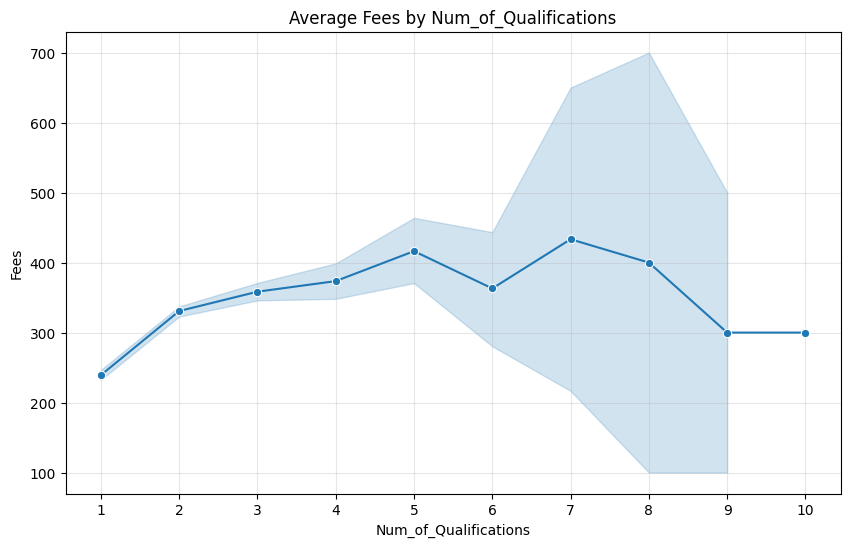

In [173]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Num_of_Qualifications', y='Fees', data=df, marker='o')
plt.title('Average Fees by Num_of_Qualifications')
plt.xlabel('Num_of_Qualifications')
plt.ylabel('Fees')
plt.xticks(ticks=df['Num_of_Qualifications'].unique())
plt.grid(True, alpha=0.3)
plt.show()

## Place

In [174]:
df['Place'].value_counts()

,count
Place,
Bangalore,1258
Mumbai,1219
Delhi,1185
Hyderabad,951
Chennai,855
Coimbatore,228
Ernakulam,153
Thiruvananthapuram,86


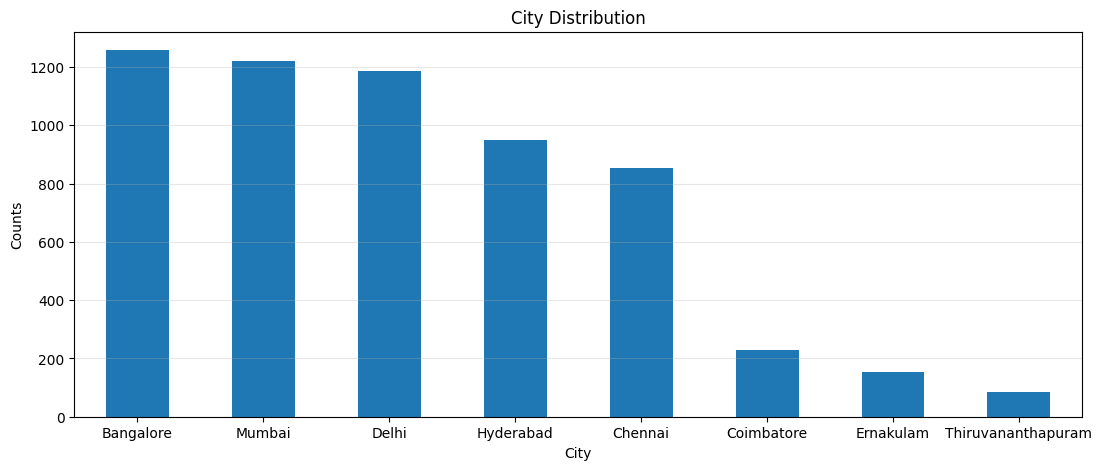

In [175]:
city_counts = df['Place'].value_counts()
plt.figure(figsize=(13, 5))
city_counts.plot(kind='bar')
plt.title('City Distribution')
plt.xlabel('City')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=0)
plt.show()

In [176]:
average_fees = df.groupby('Place')['Fees'].mean()

top_5_highest = average_fees.nlargest(5)
print("Top 5 City with Highest Average Fees:")
print(top_5_highest)

top_5_lowest = average_fees.nsmallest(5)
print("\n\nTop 5 City with Lowest Average Fees:")
print(top_5_lowest)

Top 5 City with Highest Average Fees:
Place
Delhi        362.911392
Bangalore    328.842607
Mumbai       308.292863
Hyderabad    307.507886
Chennai      283.602339
Name: Fees, dtype: float64


Top 5 City with Lowest Average Fees:
Place
Coimbatore            154.298246
Thiruvananthapuram    167.267442
Ernakulam             188.431373
Chennai               283.602339
Hyderabad             307.507886
Name: Fees, dtype: float64


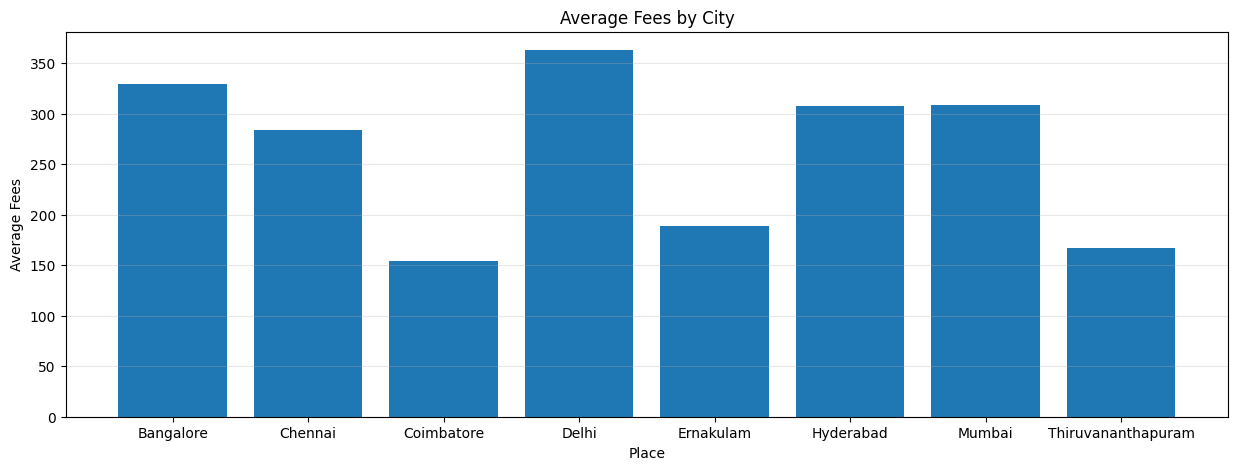

In [177]:
average_fees = df.groupby('Place')['Fees'].mean().reset_index()

plt.figure(figsize=(15, 5))
plt.bar(average_fees['Place'], average_fees['Fees'])
plt.xlabel('Place')
plt.ylabel('Average Fees')
plt.title('Average Fees by City')
plt.xticks(average_fees['Place'])
plt.grid(axis='y', alpha=0.3)
plt.show()

## Fees

In [178]:
df['Fees'].describe()

,Fees
count,5935.000000
mean,308.821904
std,190.866108
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


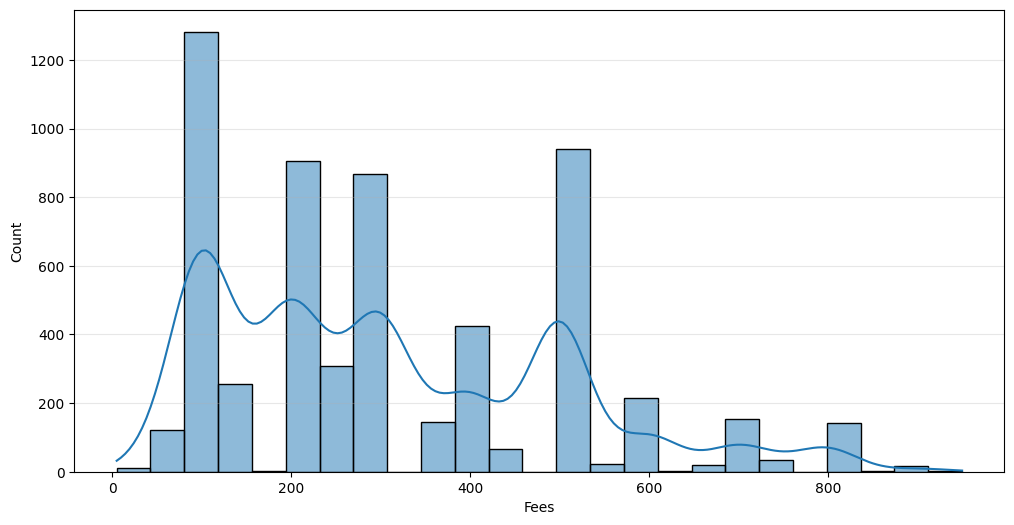

In [179]:
plt.figure(figsize=(12,6))
sns.histplot(df['Fees'],kde=True)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

<Axes: >

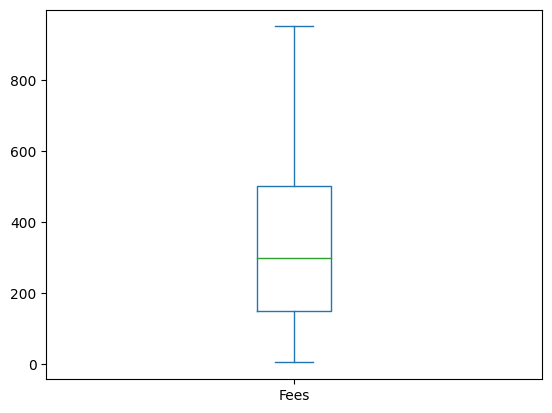

In [180]:
df['Fees'].plot(kind='box')

## heatmap

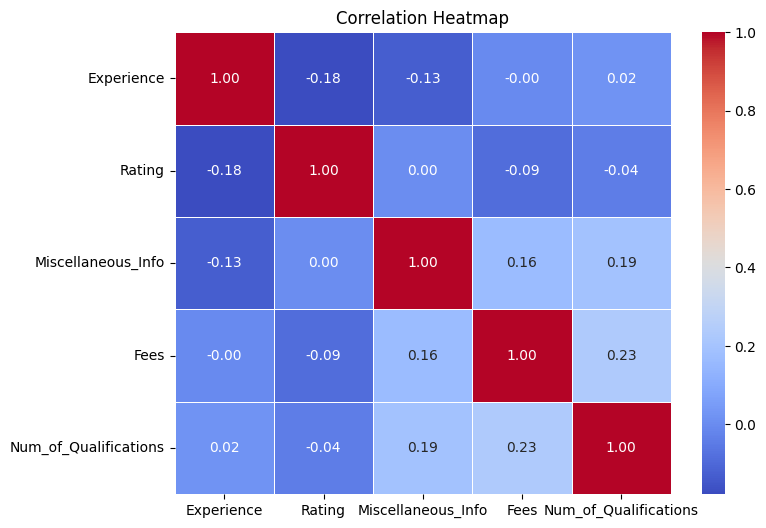

In [181]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# **PREPROCESSING 2**

In [182]:
df.head()

,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Num_of_Qualifications
0,24,100.000000,Ernakulam,Homeopath,1,100,2
1,12,98.000000,Bangalore,Ayurveda,1,350,2
2,9,94.643475,Bangalore,ENT Specialist,0,300,2
3,12,94.643475,Bangalore,Ayurveda,1,250,2
4,20,100.000000,Chennai,Ayurveda,1,250,1


In [183]:
df = df.drop(['Rating','Miscellaneous_Info', 'Num_of_Qualifications'], axis=1)
df.head()

,Experience,Place,Profile,Fees
0,24,Ernakulam,Homeopath,100
1,12,Bangalore,Ayurveda,350
2,9,Bangalore,ENT Specialist,300
3,12,Bangalore,Ayurveda,250
4,20,Chennai,Ayurveda,250


In [184]:
df = pd.get_dummies(data=df, columns = ['Profile'], prefix='profile', prefix_sep='_', dtype=int)
df.head()

,Experience,Place,Fees,profile_Ayurveda,profile_Dentist,profile_Dermatologists,profile_ENT Specialist,profile_General Medicine,profile_Homeopath
0,24,Ernakulam,100,0,0,0,0,0,1
1,12,Bangalore,350,1,0,0,0,0,0
2,9,Bangalore,300,0,0,0,1,0,0
3,12,Bangalore,250,1,0,0,0,0,0
4,20,Chennai,250,1,0,0,0,0,0


In [185]:
df = pd.get_dummies(data=df, columns = ['Place'], prefix='place', prefix_sep='_', dtype=int)
df.head()

,Experience,Fees,profile_Ayurveda,profile_Dentist,profile_Dermatologists,profile_ENT Specialist,profile_General Medicine,profile_Homeopath,place_Bangalore,place_Chennai,place_Coimbatore,place_Delhi,place_Ernakulam,place_Hyderabad,place_Mumbai,place_Thiruvananthapuram
0,24,100,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,12,350,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,9,300,0,0,0,1,0,0,1,0,0,0,0,0,0,0
3,12,250,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,20,250,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [186]:
df['Experience'] = np.log(df['Experience'])
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Experience,Fees,profile_Ayurveda,profile_Dentist,profile_Dermatologists,profile_ENT Specialist,profile_General Medicine,profile_Homeopath,place_Bangalore,place_Chennai,place_Coimbatore,place_Delhi,place_Ernakulam,place_Hyderabad,place_Mumbai,place_Thiruvananthapuram
0,3.178054,100,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,2.484907,350,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,2.197225,300,0,0,0,1,0,0,1,0,0,0,0,0,0,0
3,2.484907,250,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2.995732,250,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [187]:
df.shape

(5935, 16)

In [188]:
df = df[df.Experience != -np.inf]
df.head()

,Experience,Fees,profile_Ayurveda,profile_Dentist,profile_Dermatologists,profile_ENT Specialist,profile_General Medicine,profile_Homeopath,place_Bangalore,place_Chennai,place_Coimbatore,place_Delhi,place_Ernakulam,place_Hyderabad,place_Mumbai,place_Thiruvananthapuram
0,3.178054,100,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,2.484907,350,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,2.197225,300,0,0,0,1,0,0,1,0,0,0,0,0,0,0
3,2.484907,250,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2.995732,250,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [189]:
df.shape

(5872, 16)

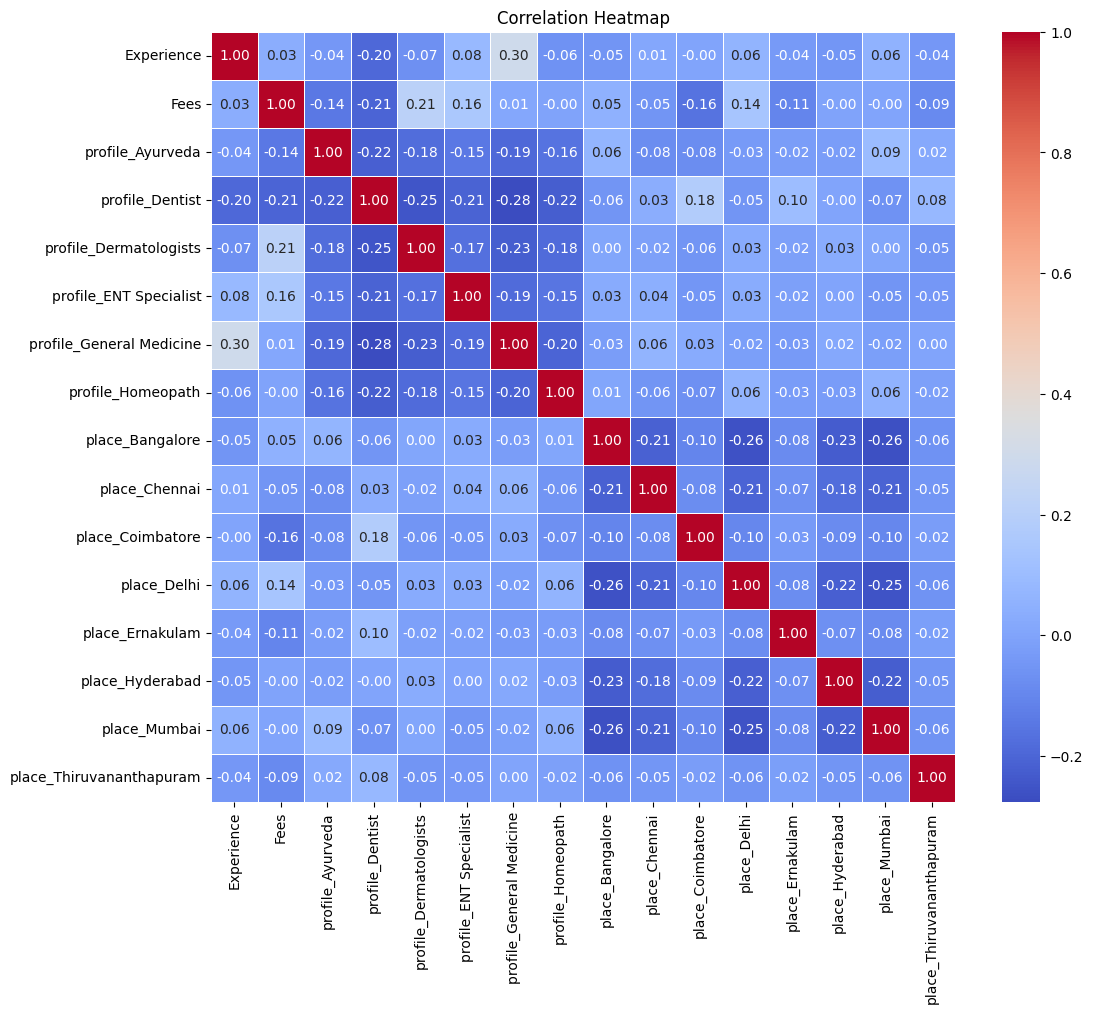

In [190]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# MODEL

In [191]:
df.head()

,Experience,Fees,profile_Ayurveda,profile_Dentist,profile_Dermatologists,profile_ENT Specialist,profile_General Medicine,profile_Homeopath,place_Bangalore,place_Chennai,place_Coimbatore,place_Delhi,place_Ernakulam,place_Hyderabad,place_Mumbai,place_Thiruvananthapuram
0,3.178054,100,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,2.484907,350,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,2.197225,300,0,0,0,1,0,0,1,0,0,0,0,0,0,0
3,2.484907,250,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2.995732,250,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [192]:
X = df.drop(['Fees'], axis=1)
y = df['Fees']

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [194]:
X_train.shape

(4697, 15)

In [195]:
y_train.shape

(4697,)

In [196]:
# Reshape target variables
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

# Standardize features and target variables
scaler_X = StandardScaler().fit(X_train)
scaler_y = StandardScaler().fit(y_train)

X_train = scaler_X.transform(X_train)
y_train = scaler_y.transform(y_train)
X_test = scaler_X.transform(X_test)
y_test = scaler_y.transform(y_test)

In [197]:
models = {
    "XGBRegressor": XGBRegressor(),
    "LinearRegression": LinearRegression(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "SVR": SVR(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor()
}

# Buat list untuk menyimpan hasil evaluasi
training_results = []
testing_results = []

# Evaluasi setiap model
for name, model in models.items():
    model.fit(X_train, y_train)

    # Prediksi pada data latih
    y_train_pred = model.predict(X_train)

    # Prediksi pada data uji
    y_test_pred = model.predict(X_test)

    # Simpan hasil evaluasi ke list
    training_results.append({
        "Model": name,
        "MSE": mean_squared_error(y_train, y_train_pred),
        "MAE": mean_absolute_error(y_train, y_train_pred)
    })

    testing_results.append({
        "Model": name,
        "MSE": mean_squared_error(y_test, y_test_pred),
        "MAE": mean_absolute_error(y_test, y_test_pred)
    })

# Konversi hasil evaluasi menjadi DataFrame
df_train_results = pd.DataFrame(training_results)
df_test_results = pd.DataFrame(testing_results)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [198]:
print("Training Results:")
df_train_results

Training Results:


,Model,MSE,MAE
0,XGBRegressor,0.621945,0.602034
1,LinearRegression,0.856279,0.738810
2,DecisionTreeRegressor,0.585944,0.563041
3,RandomForestRegressor,0.599759,0.587816
4,SVR,0.846343,0.686742
5,KNeighborsRegressor,0.716918,0.648872
6,AdaBoostRegressor,0.904270,0.791011


In [199]:
print("Testing Results:")
df_test_results

Testing Results:


,Model,MSE,MAE
0,XGBRegressor,0.935137,0.743169
1,LinearRegression,0.809299,0.723030
2,DecisionTreeRegressor,1.110840,0.786358
3,RandomForestRegressor,0.991894,0.760423
4,SVR,0.794157,0.682469
5,KNeighborsRegressor,0.953160,0.755260
6,AdaBoostRegressor,0.879749,0.787587


##Final model

In [200]:
finalmodel = XGBRegressor()
finalmodel.fit(X_train, y_train)

# Evaluate the model on training data
y_train_pred = finalmodel.predict(X_train)
print("XGBRegressor")
print("\nTraining Data Evaluation")
print("MSE:", mean_squared_error(y_train, y_train_pred))
print("MAE:", mean_absolute_error(y_train, y_train_pred))

# Evaluate the model on testing data
y_test_pred = finalmodel.predict(X_test)
print("\nTesting Data Evaluation")
print("MSE:", mean_squared_error(y_test, y_test_pred))
print("MAE:", mean_absolute_error(y_test, y_test_pred))

XGBRegressor

Training Data Evaluation
MSE: 0.6219452681235867
MAE: 0.6020335613510065

Testing Data Evaluation
MSE: 0.9351369461897209
MAE: 0.7431685488668447


## Save model

In [201]:
import pickle
with open('finalmodel.pkl', 'wb') as f:
    pickle.dump(finalmodel, f)
with open('scaler_X.pkl', 'wb') as f:
    pickle.dump(scaler_X, f)
with open('scaler_y.pkl', 'wb') as f:
    pickle.dump(scaler_y, f)

## Prediction

In [203]:
import pandas as pd
import numpy as np
import pickle

# Load test data
test_df = pd.read_excel('Test.xlsx')

# Drop unnecessary columns
test_df = test_df.drop(['Qualification', 'Rating', 'Miscellaneous_Info'], axis=1)

# Extract numeric experience and convert to integer
test_df['Experience'] = test_df['Experience'].str.extract('(\d+)').astype(int)

# Clean and standardize 'Place' column
test_df['Place'] = test_df['Place'].apply(lambda x: x.split(',')[-1].strip() if isinstance(x, str) else x)
test_df = test_df[test_df['Place'] != 'e']

# One-hot encoding for categorical columns
test_df = pd.get_dummies(data=test_df, columns=['Profile'], prefix='profile', prefix_sep='_', dtype=int)
test_df = pd.get_dummies(data=test_df, columns=['Place'], prefix='place', prefix_sep='_', dtype=int)

# Apply log transformation to 'Experience'
test_df['Experience'] = np.log(test_df['Experience'])
test_df = test_df[test_df.Experience != -np.inf]

# Align test data with training data (handling any missing columns after one-hot encoding)
with open('scaler_X.pkl', 'rb') as f:
    scaler_X = pickle.load(f)
missing_cols = set(scaler_X.feature_names_in_) - set(test_df.columns)
for col in missing_cols:
    test_df[col] = 0

# Ensure the columns are in the same order as during training
test_df = test_df[scaler_X.feature_names_in_]

# Standardize test data using the same scalers
test_df_scaled = scaler_X.transform(test_df)

# Load the trained model and scaler for the target variable
with open('finalmodel.pkl', 'rb') as f:
    finalmodel = pickle.load(f)
with open('scaler_y.pkl', 'rb') as f:
    scaler_y = pickle.load(f)

# Perform inference using the trained model
predictions = finalmodel.predict(test_df_scaled)

# Reverse the transformation on predictions
predictions = scaler_y.inverse_transform(predictions.reshape(-1, 1))

# Add predictions to the results DataFrame
results_df = test_df.copy()
results_df['Predicted_Fees'] = predictions

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [204]:
results_df['Predicted_Fees']

,Predicted_Fees
0,226.453110
1,291.455078
2,565.986633
4,251.412430
5,230.008347
...,...
1982,222.641312
1983,262.268097
1984,294.046448
1985,206.319122
